In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [12]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [13]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [14]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

Inspeccionar la BD y las tablas que contiene

In [20]:
inspector = inspect(engine)

In [21]:
inspector.get_table_names()

['measurement', 'station']

In [22]:
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [15]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [16]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [17]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [66]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

measurement_query= session.query(Measurement.date,Measurement.prcp).order_by(Measurement.date).\
    filter(Measurement.date>='2016-09-01').filter(Measurement.prcp!="None").all()

for mq in measurement_query:
    print(mq)


('2016-09-01', 0.0)
('2016-09-01', 0.0)
('2016-09-01', 0.0)
('2016-09-01', 0.02)
('2016-09-01', 0.01)
('2016-09-02', 0.0)
('2016-09-02', 0.02)
('2016-09-02', 0.19)
('2016-09-02', 0.01)
('2016-09-02', 0.03)
('2016-09-03', 0.0)
('2016-09-03', 0.07)
('2016-09-03', 0.08)
('2016-09-03', 0.12)
('2016-09-03', 1.0)
('2016-09-04', 0.03)
('2016-09-04', 0.03)
('2016-09-04', 0.74)
('2016-09-04', 0.14)
('2016-09-04', 0.44)
('2016-09-05', 0.11)
('2016-09-05', 0.02)
('2016-09-05', 0.03)
('2016-09-05', 0.18)
('2016-09-06', 0.05)
('2016-09-06', 0.04)
('2016-09-06', 0.03)
('2016-09-06', 0.11)
('2016-09-06', 1.0)
('2016-09-07', 0.05)
('2016-09-07', 0.1)
('2016-09-07', 0.23)
('2016-09-07', 0.11)
('2016-09-07', 0.16)
('2016-09-07', 1.35)
('2016-09-08', 0.0)
('2016-09-08', 0.22)
('2016-09-08', 0.01)
('2016-09-08', 0.01)
('2016-09-08', 0.07)
('2016-09-08', 0.15)
('2016-09-09', 0.03)
('2016-09-09', 0.01)
('2016-09-09', 0.29)
('2016-09-09', 0.23)
('2016-09-09', 0.16)
('2016-09-09', 0.35)
('2016-09-10', 0.0)
('

('2017-04-02', 0.0)
('2017-04-02', 0.0)
('2017-04-03', 0.0)
('2017-04-03', 0.08)
('2017-04-03', 0.09)
('2017-04-03', 0.0)
('2017-04-03', 0.26)
('2017-04-03', 0.23)
('2017-04-04', 0.0)
('2017-04-04', 0.04)
('2017-04-04', 0.0)
('2017-04-04', 0.0)
('2017-04-04', 0.0)
('2017-04-04', 0.09)
('2017-04-04', 0.02)
('2017-04-05', 0.0)
('2017-04-05', 0.04)
('2017-04-05', 0.07)
('2017-04-05', 0.0)
('2017-04-05', 0.0)
('2017-04-05', 0.1)
('2017-04-05', 0.45)
('2017-04-06', 0.0)
('2017-04-06', 0.0)
('2017-04-06', 0.0)
('2017-04-06', 0.0)
('2017-04-06', 0.0)
('2017-04-06', 0.06)
('2017-04-06', 0.0)
('2017-04-07', 0.0)
('2017-04-07', 0.0)
('2017-04-07', 0.0)
('2017-04-07', 0.0)
('2017-04-07', 0.0)
('2017-04-07', 0.0)
('2017-04-08', 0.0)
('2017-04-08', 0.0)
('2017-04-08', 0.0)
('2017-04-09', 0.0)
('2017-04-09', 0.0)
('2017-04-09', 0.0)
('2017-04-09', 0.0)
('2017-04-10', 0.0)
('2017-04-10', 0.01)
('2017-04-10', 0.0)
('2017-04-10', 0.0)
('2017-04-10', 0.01)
('2017-04-10', 0.0)
('2017-04-11', 0.0)
('2017-

In [68]:
df_m = pd.DataFrame(data=measurement_query)
df_m.set_index("date", inplace=True)
df_m.head(10)

prcp
date            
2016-09-01  0.00
2016-09-01  0.00
2016-09-01  0.00
2016-09-01  0.02
2016-09-01  0.01
2016-09-02  0.00
2016-09-02  0.02
2016-09-02  0.19
2016-09-02  0.01
2016-09-02  0.03

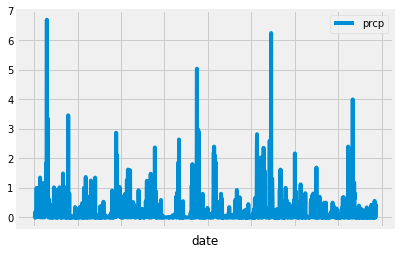

In [71]:
df_m.plot()

In [72]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_m.describe()

prcp
count  1968.000000
mean      0.171479
std       0.451817
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000

# Exploratory Station Analysis

In [23]:
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [78]:
# Design a query to show how many stations are available in this dataset?
station_query = session.query(Station.id,Station.station,Station.name).distinct(Station.id).all()
for sq in station_query:
    print(sq)

(1, 'USC00519397', 'WAIKIKI 717.2, HI US')
(2, 'USC00513117', 'KANEOHE 838.1, HI US')
(3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US')
(4, 'USC00517948', 'PEARL CITY, HI US')
(5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US')
(6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US')
(7, 'USC00519281', 'WAIHEE 837.5, HI US')
(8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US')
(9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US')


In [99]:
#List the stations and observation counts in descending order.
#Which station has the highest number of observations?

jsc = session.query(Station.station,Station.name,func.count(Measurement.station)).\
    filter(Station.station==Measurement.station).group_by(Station.name).order_by(func.count(Measurement.station).desc())

for row in jsc:
    print(row)

('USC00519281', 'WAIHEE 837.5, HI US', 2772)
('USC00519397', 'WAIKIKI 717.2, HI US', 2724)
('USC00513117', 'KANEOHE 838.1, HI US', 2709)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202)
('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979)
('USC00517948', 'PEARL CITY, HI US', 1372)
('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)


In [104]:
#Filter by the station with the highest number of observations.

jsc = session.query(Station.id,Station.name,func.count(Measurement.station)).\
    filter(Station.station==Measurement.station).filter(Measurement.date>='2016-09-01').\
    filter(Measurement.tobs!="None").group_by(Station.name).order_by(func.count(Measurement.station).desc()).limit(1)

for row in jsc:
    print(row)


(1, 'WAIKIKI 717.2, HI US', 352)


In [110]:
#Filter by the station with the highest number of observations.

jsc = session.query(Measurement.tobs).\
    filter(Station.station==Measurement.station).filter(Measurement.date>='2016-09-01').\
    filter(Measurement.tobs!="None").filter(Station.id==1).all()

for row in jsc:
    print(row)

(81.0,)
(80.0,)
(79.0,)
(75.0,)
(79.0,)
(76.0,)
(76.0,)
(80.0,)
(79.0,)
(78.0,)
(76.0,)
(78.0,)
(78.0,)
(75.0,)
(79.0,)
(80.0,)
(79.0,)
(81.0,)
(77.0,)
(77.0,)
(78.0,)
(76.0,)
(82.0,)
(81.0,)
(78.0,)
(80.0,)
(80.0,)
(79.0,)
(80.0,)
(80.0,)
(80.0,)
(79.0,)
(79.0,)
(79.0,)
(80.0,)
(80.0,)
(79.0,)
(78.0,)
(76.0,)
(75.0,)
(80.0,)
(80.0,)
(79.0,)
(80.0,)
(79.0,)
(78.0,)
(78.0,)
(80.0,)
(81.0,)
(79.0,)
(77.0,)
(79.0,)
(78.0,)
(77.0,)
(77.0,)
(78.0,)
(77.0,)
(78.0,)
(77.0,)
(76.0,)
(77.0,)
(77.0,)
(77.0,)
(77.0,)
(77.0,)
(76.0,)
(75.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(72.0,)
(71.0,)
(72.0,)
(77.0,)
(77.0,)
(77.0,)
(77.0,)
(77.0,)
(75.0,)
(76.0,)
(76.0,)
(75.0,)
(72.0,)
(74.0,)
(75.0,)
(73.0,)
(76.0,)
(75.0,)
(68.0,)
(75.0,)
(75.0,)
(72.0,)
(69.0,)
(71.0,)
(68.0,)
(67.0,)
(69.0,)
(73.0,)
(70.0,)
(70.0,)
(70.0,)
(66.0,)
(67.0,)
(70.0,)
(66.0,)
(62.0,)
(71.0,)
(73.0,)
(69.0,)
(77.0,)
(74.0,)
(71.0,)
(72.0,)
(74.0,)
(74.0,)
(74.0,)
(74.0,)
(71.0,)
(73.0,)
(69.0,)
(66.0,)
(62.0,)
(66.0,)
(63.0,)


In [112]:
#df_m = pd.DataFrame(data=measurement_query)
df_s = pd.DataFrame(data=jsc)
df_s.head()

tobs
0  81.0
1  80.0
2  79.0
3  75.0
4  79.0

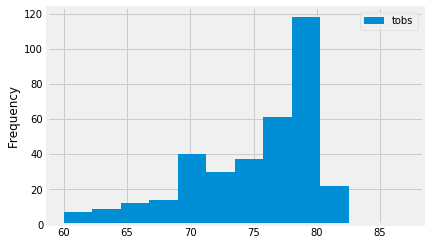

In [115]:
df_s.plot.hist( bins=12 )

![precipitation](Images/station-histogram.png)

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
